In [27]:
import data_preprocessing_visible as dpp 
import visualization_and_algorithm_visible as vaa

from importlib import reload

reload(dpp)
reload(vaa)

<module 'visualization_and_algorithm_visible' from '/Users/mikomiwa/Downloads/COLLEGE/Github_folder/DATA440/DATA_440_Final_Project/visualization_and_algorithm_visible.py'>

In [28]:
import pandas as pd

In [29]:
conn, c = dpp.Connect()

## Test case: try to read and classify the isomer below

'proala0054'

In [30]:
dipep = 'ProAla'
dipep_conformer = 'proala0054'

In [31]:
#makes a table names 't{dipep_conformer}'
vaa.make_conf_tables(dipep, dipep_conformer)

########## read_coords() Done ##########


True

In [32]:
pd.read_sql(f'SELECT * FROM t{dipep_conformer}', conn).head(3)

,atom_idx,element,x_coord,y_coord,z_coord
0,1,C,-2.954504,-1.542673,0.326014
1,2,N,-1.877768,-1.178467,-0.616389
2,3,C,-1.882640,0.283659,-0.840691


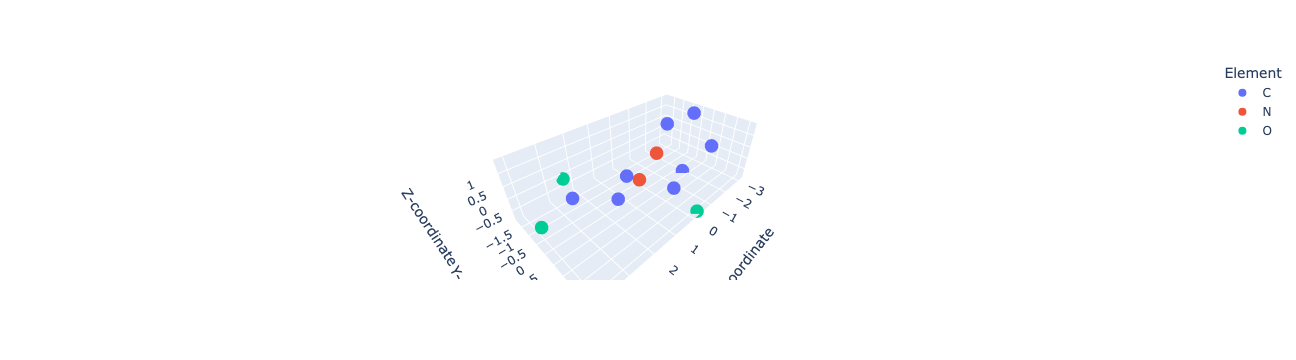

In [33]:
#visualize the conformer
globals()[f'{dipep_conformer}_df'], globals()[f'{dipep_conformer}_fig']= vaa.conf_visualization(dipep_conformer)
globals()[f'{dipep_conformer}_fig'].show()

In [26]:
#now let's see if based on the coordinates we can identify the molecule as cis or trans
vaa.c_t_isomer(dipep_conformer)

(177.07625164853283, 't')

In [38]:
#validation function to come 

globals()[f'{dipep}_df'] = pd.read_csv('data/' + dipep + '_neutrals/' + dipep + '_workup.csv', index_col = 0) 

In [39]:
globals()[f'{dipep}_df'].head()

,conformer_file,conformer_id,isomer,ring
0,proala0054a.log:,proala0054,t,4i
1,proala0005a.log:,proala0005,t,4o
2,proala0043a.log:,proala0043,t,4o
3,proala0120a.log:,proala0120,t,4i
4,proala0049a.log:,proala0049,t,4i


In [40]:
dpp.conformer_to_sql(dipep, globals()[f'{dipep}_df'].head())

True

In [49]:
sql = f'''
SELECT isomer
FROM t{dipep}
WHERE conformer_id = '{dipep_conformer}'
'''

pd.read_sql(sql, conn)

,isomer
0,t


In [50]:
#it matches!
#will use the above logic to create validation 